# 마켓과 머신러닝

## 전통적인 프로그램

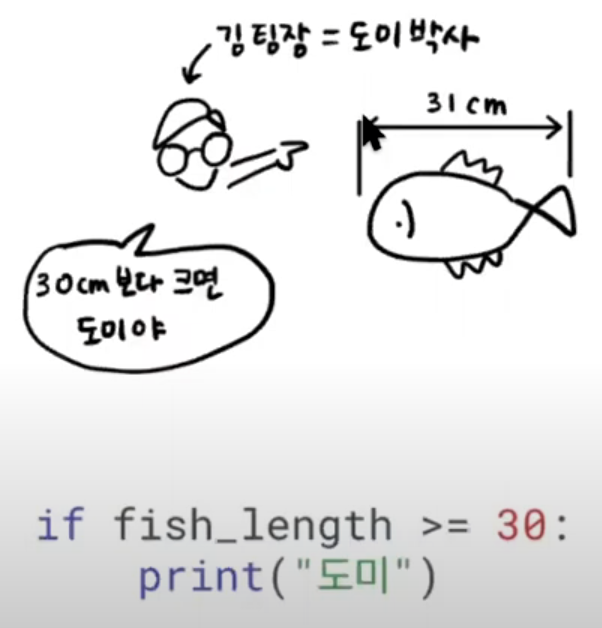

## 분류(Classification) 예측
* 머신러닝에서는 다양한 종류(class)를 구분하는 문제를 분류라고 한다.
* 2개의 클래스중 하나의 문제를 고르는 문제를 이진 분류(binary classification)라고 한다.

## 생선 분류 문제

### 도미 데이터 준비하기

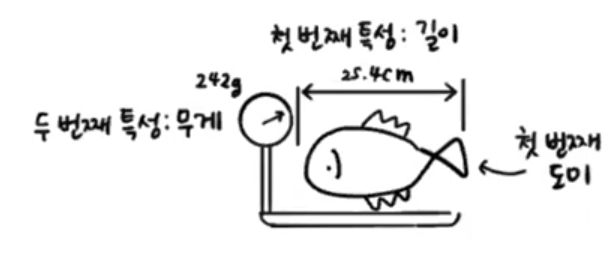

In [5]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [6]:
len(bream_length), len(bream_weight)

(35, 35)

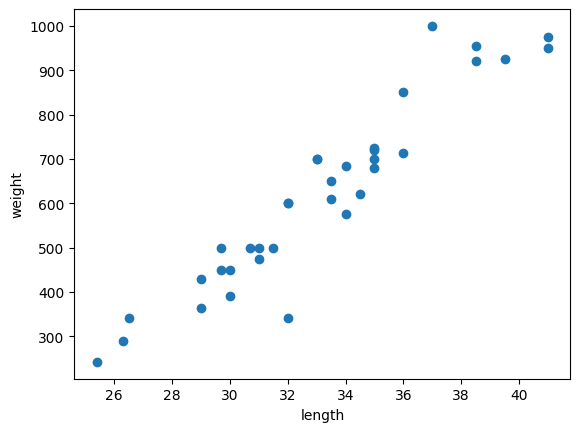

In [7]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 빙어 데이터 준비하기

In [8]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
len(smelt_length), len(smelt_weight)

(14, 14)

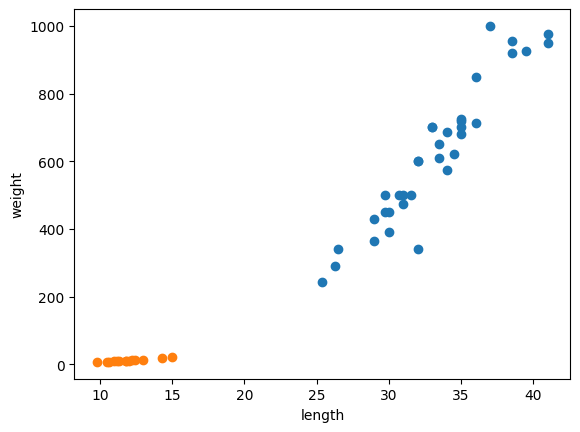

In [9]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 첫 번째 머신러닝 프로그램

In [10]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight

In [11]:
# 리스트 내포
# 길이와 무게 정보를 합침 => 물고기의 정보
fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


### 정답 준비

In [12]:
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## k-최근접 이웃 모델

In [13]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [14]:
# k-최근접 이웃모델 인스턴스 생성
# n_neighbors 기본값 : 5 .. 최근접한이웃데이터 5개가 무엇인지?

# xxxxClassifier() => 분류모델
# xxxxRegressor() => 선형회귀모델 (회귀모델)
kn = KNeighborsClassifier()

In [15]:
# fit함수로 모델 학습 (피처데이터셋, 라벨데이터셋)
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [16]:
# score 모델의 성능을 평가하는 함수, 모델의 멤버함수
# 평가방식 => 정답률
kn.score(fish_data, fish_target)

1.0

### k-최근접 이웃 알고리즘

### 길이: 30cm, 무게: 600g인 물고기는 어떤 물고기인가?

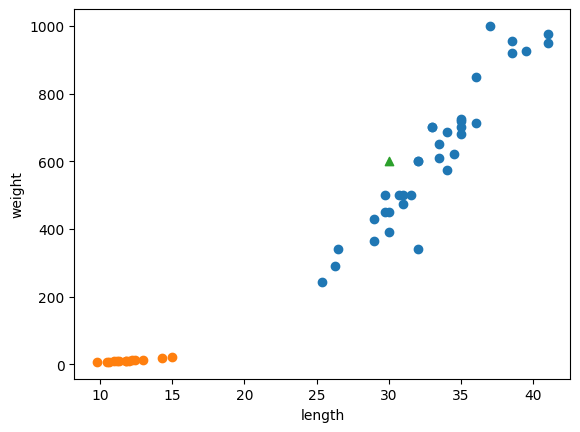

In [17]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 특정 값에 대한 예측

In [18]:
# 하나의 데이터를 입력하더라도 2차원 리스트로 입력해야함
kn.predict([[30, 600]])

array([1])

In [19]:
# 모델에서 학습한 데이터를 _fix_X에 저장하고 있음
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [20]:
# 학습했을때 사용한 라벨(종속변수) 정보
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
# n_neighbors 인접한 이웃을 몇개로 설정할지에 대한 인자
# 만약에 49로 설정했다면 절대다수가 도미이기 때문에 무조건 도미를 예측 할 것이다.
# 빙어데이터 구간에 예측이 들어간다해도 14/35로 절대 다수가 도미이기때문에 빙어는 절대 예측할 수 없다.
# 데이터셋에 따른 적절한 n_neighbors 최적화가 필요하다

# n_neighbors와 같은 파라메터를 특별히 하이퍼파라메터라고한다.
# 하이퍼파라메터는 모델에서 학습하지않고 모델 설계자가 최적화해야한다.

In [22]:
kn49 = KNeighborsClassifier(n_neighbors=49)

In [23]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [24]:
# 빙어를 예측 정답률
print(35/49)

0.7142857142857143
